W0824 18:38:43.720411 139961727289152 util.py:244] Unresolved object in checkpoint: (root).optimizer
W0824 18:38:43.721405 139961727289152 util.py:244] Unresolved object in checkpoint: (root).optimizer.iter
W0824 18:38:43.722153 139961727289152 util.py:244] Unresolved object in checkpoint: (root).optimizer.beta_1
W0824 18:38:43.722866 139961727289152 util.py:244] Unresolved object in checkpoint: (root).optimizer.beta_2
W0824 18:38:43.723583 139961727289152 util.py:244] Unresolved object in checkpoint: (root).optimizer.decay
W0824 18:38:43.724239 139961727289152 util.py:244] Unresolved object in checkpoint: (root).optimizer.learning_rate
W0824 18:38:43.724897 139961727289152 util.py:244] Unresolved object in checkpoint: (root).optimizer's state 'm' for (root).layer_with_weights-0.kernel
W0824 18:38:43.725569 139961727289152 util.py:244] Unresolved object in checkpoint: (root).optimizer's state 'm' for (root).layer_with_weights-0.bias
W0824 18:38:43.726259 139961727289152 util.py:244] Un

W0824 18:38:43.758434 139961727289152 util.py:244] Unresolved object in checkpoint: (root).optimizer's state 'm' for (root).layer_with_weights-1.bias
W0824 18:38:43.758893 139961727289152 util.py:244] Unresolved object in checkpoint: (root).optimizer's state 'm' for (root).layer_with_weights-2.kernel
W0824 18:38:43.759359 139961727289152 util.py:244] Unresolved object in checkpoint: (root).optimizer's state 'm' for (root).layer_with_weights-2.bias
W0824 18:38:43.759821 139961727289152 util.py:244] Unresolved object in checkpoint: (root).optimizer's state 'm' for (root).layer_with_weights-3.kernel
W0824 18:38:43.760288 139961727289152 util.py:244] Unresolved object in checkpoint: (root).optimizer's state 'm' for (root).layer_with_weights-3.bias
W0824 18:38:43.760747 139961727289152 util.py:244] Unresolved object in checkpoint: (root).optimizer's state 'v' for (root).layer_with_weights-0.kernel
W0824 18:38:43.761213 139961727289152 util.py:244] Unresolved object in checkpoint: (root).opt

W0824 18:38:43.788617 139961727289152 util.py:244] Unresolved object in checkpoint: (root).optimizer's state 'v' for (root).layer_with_weights-1.bias
W0824 18:38:43.789047 139961727289152 util.py:244] Unresolved object in checkpoint: (root).optimizer's state 'v' for (root).layer_with_weights-2.kernel
W0824 18:38:43.789470 139961727289152 util.py:244] Unresolved object in checkpoint: (root).optimizer's state 'v' for (root).layer_with_weights-2.bias
W0824 18:38:43.789893 139961727289152 util.py:244] Unresolved object in checkpoint: (root).optimizer's state 'v' for (root).layer_with_weights-3.kernel
W0824 18:38:43.793429 139961727289152 util.py:244] Unresolved object in checkpoint: (root).optimizer's state 'v' for (root).layer_with_weights-3.bias
W0824 18:38:43.793972 139961727289152 util.py:252] A checkpoint was restored (e.g. tf.train.Checkpoint.restore or tf.keras.Model.load_weights) but not all checkpointed values were used. See above for specific issues. Use expect_partial() on the l

W0824 18:38:43.825687 139961727289152 util.py:244] Unresolved object in checkpoint: (root).optimizer
W0824 18:38:43.826255 139961727289152 util.py:244] Unresolved object in checkpoint: (root).optimizer.iter
W0824 18:38:43.826696 139961727289152 util.py:244] Unresolved object in checkpoint: (root).optimizer.beta_1
W0824 18:38:43.827107 139961727289152 util.py:244] Unresolved object in checkpoint: (root).optimizer.beta_2
W0824 18:38:43.827543 139961727289152 util.py:244] Unresolved object in checkpoint: (root).optimizer.decay
W0824 18:38:43.827955 139961727289152 util.py:244] Unresolved object in checkpoint: (root).optimizer.learning_rate
W0824 18:38:43.828371 139961727289152 util.py:244] Unresolved object in checkpoint: (root).optimizer's state 'm' for (root).layer_with_weights-0.kernel
W0824 18:38:43.828790 139961727289152 util.py:244] Unresolved object in checkpoint: (root).optimizer's state 'm' for (root).layer_with_weights-0.bias
W0824 18:38:43.829220 139961727289152 util.py:244] Un

W0824 18:38:43.853767 139961727289152 util.py:244] Unresolved object in checkpoint: (root).optimizer's state 'm' for (root).layer_with_weights-1.bias
W0824 18:38:43.854161 139961727289152 util.py:244] Unresolved object in checkpoint: (root).optimizer's state 'm' for (root).layer_with_weights-2.kernel
W0824 18:38:43.854546 139961727289152 util.py:244] Unresolved object in checkpoint: (root).optimizer's state 'm' for (root).layer_with_weights-2.bias
W0824 18:38:43.854931 139961727289152 util.py:244] Unresolved object in checkpoint: (root).optimizer's state 'm' for (root).layer_with_weights-3.kernel
W0824 18:38:43.855317 139961727289152 util.py:244] Unresolved object in checkpoint: (root).optimizer's state 'm' for (root).layer_with_weights-3.bias
W0824 18:38:43.855704 139961727289152 util.py:244] Unresolved object in checkpoint: (root).optimizer's state 'v' for (root).layer_with_weights-0.kernel
W0824 18:38:43.856086 139961727289152 util.py:244] Unresolved object in checkpoint: (root).opt

(827, 1300, 3)
Es una placa, hora de buscar la ultima letra


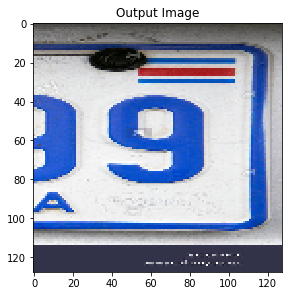

In [49]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
import numpy as np
import cv2
import pickle
import pandas as pd
import json
from PIL import Image

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

IMG_SIZE=128

def load_first_model():
    model = Sequential()

    pickle_in = open("Features_output.pickle","rb")
    X = pickle.load(pickle_in)
    model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(256, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

    model.add(Dense(64))

    model.add(Dense(1))
    model.add(Activation('sigmoid'))

    checkpoint_path = "/home/alejandro/placas/cp.ckpt"

    model.load_weights(checkpoint_path)
    return model

def get_image_in_format(filepath):      
    im = np.array(Image.open(filepath))
    print(im.shape)
    new_array = cv2.resize(im, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3) 

def get_image(filepath):
    im = np.array(Image.open(filepath))
    return im
def main():
    first_model=load_first_model()
    #agregar funcionalidad de caputrar imagen.
    #por ahora estamos usando una imagen fija
    plate_image=get_image_in_format('/home/alejandro/placas/prueba10.jpg')
    raw_image=get_image('/home/alejandro/placas/prueba10.jpg')
    prediction_upon_image_captured=first_model.predict(plate_image)
    if prediction_upon_image_captured==0:
        print("Es una placa, hora de buscar la ultima letra")
        #forma burda de recortar la imagen pra obtener la ultima posicion de la placa
        x_point_top = raw_image.shape[1]/8*6
        y_point_top = 0
        x_point_bot = raw_image.shape[1]
        y_point_bot = raw_image.shape[0]
        plateImage = Image.fromarray(raw_image).crop((x_point_top, y_point_top, x_point_bot, y_point_bot))
        plateImage=plateImage.resize((IMG_SIZE,IMG_SIZE))
        #deberia hacer un llamado al modelo de verny
        fig, ax = plt.subplots(1, 1, constrained_layout=True)
        # Set title
        ax.set_title('Output Image')
        # Display the images
        ax.imshow(plateImage)
        plt.show()
    else:
        print("No es placa")
       
    
  
if __name__== "__main__":
  main()